# Absenteeism at work 

Remind of problem definition: predict the time of absence of an employee knowing some information of the reasons or the type of person. 

## Data Cleaning 


**More info regarding data description:**
- If reason of absence is 0, it could means the row doesn't relate to absence but used to add additionnal information (such as a disciplinary failure).
- If absenteeism_time_in_hours is 0, depending on the context it could means the absence is less than 1 hour or not absent at all.
- If month_of_absence, disciplinary_failure and absenteeism_time_in_hours are all 0, we can assume they were probably not absent.
- Service Time is the numbers of year in the company 
- Hit Target is the % of achievement regarding the objectives of the employee


**Cleaning tasks:**
- [x] Rename some of the columns (Son and Work load Average/day)
- [x] Cleaning of columns name
- [x] Gather outliers into bin for Absenteeism time in hours
- [x] Correct dtypes of categorical data
- [x] Check missing values
- [ ] Create a new colunm to count the total disciplinary failure for an employee
- [ ] Drop the rows where reason of absence == 0 because these rows do not relate to absenteism but rather the comportment of an employee (disciplinary failure). 


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

pd.set_option('max_columns',25)

In [179]:
df = pd.read_csv('../data/Absenteeism_at_work.csv', sep=';')
print(df.shape)
df.head()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [181]:
# Cleaning of columns names

df.rename(columns={'Son':'children'}, inplace=True)

df.columns = [col.lower().replace('/','_').replace(' ','_').rstrip('_') for col in df.columns]
df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,children,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [182]:
# Changing the types of categorical data to object

categorical_col = ['id','reason_for_absence','month_of_absence','day_of_the_week','seasons'
                   ,'disciplinary_failure', 'education','social_drinker','social_smoker']

df[categorical_col] = df[categorical_col].astype(object)
df.dtypes

id                                  object
reason_for_absence                  object
month_of_absence                    object
day_of_the_week                     object
seasons                             object
transportation_expense               int64
distance_from_residence_to_work      int64
service_time                         int64
age                                  int64
work_load_average_day              float64
hit_target                           int64
disciplinary_failure                object
education                           object
children                             int64
social_drinker                      object
social_smoker                       object
pet                                  int64
weight                               int64
height                               int64
body_mass_index                      int64
absenteeism_time_in_hours            int64
dtype: object

In [183]:
df.describe().round(2)

,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,children,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00
mean,221.33,29.63,12.55,36.45,271.49,94.59,1.02,0.75,79.04,172.11,26.68,6.92
std,66.95,14.84,4.38,6.48,39.06,3.78,1.10,1.32,12.88,6.03,4.29,13.33
min,118.00,5.00,1.00,27.00,205.92,81.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,179.00,16.00,9.00,31.00,244.39,93.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,225.00,26.00,13.00,37.00,264.25,95.00,1.00,0.00,83.00,170.00,25.00,3.00
75%,260.00,50.00,16.00,40.00,294.22,97.00,2.00,1.00,89.00,172.00,31.00,8.00
max,388.00,52.00,29.00,58.00,378.88,100.00,4.00,8.00,108.00,196.00,38.00,120.00


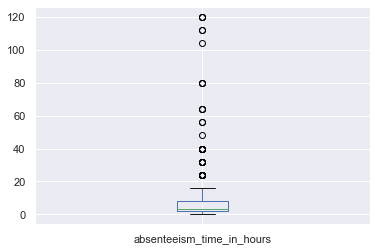

In [184]:
df['absenteeism_time_in_hours'].plot.box();

# More than 20 hours is outliers - it means people were absent more than a day

In [185]:
# Create bins to gather outliers somewhere

label_absenteeism_time = ['0-2 hours','1/2 day','1 day','1-2 days','more than 2 days']

df['absenteeism_bins']=pd.cut(df.absenteeism_time_in_hours,[-0.001,2.0,4.0,8.0,20.0,120.0])
df.absenteeism_bins.value_counts()

(-0.001, 2.0]    289
(4.0, 8.0]       216
(2.0, 4.0]       172
(20.0, 120.0]     44
(8.0, 20.0]       19
Name: absenteeism_bins, dtype: int64

In [206]:
# Create a new column to gather the count of disciplinary failure 
print("Value frequency of disciplinary failure:\n", df.disciplinary_failure.value_counts())

total_disciplinary_failures = df.groupby('id').disciplinary_failure.sum().reset_index()\
                                .rename(columns={'disciplinary_failure':'total_disciplinary_failures'})
total_disciplinary_failures
df1 = pd.merge(df,total_disciplinary_failures, how='outer',on='id')
df1.head()

Value frequency of disciplinary failure:
 0    700
1     40
Name: disciplinary_failure, dtype: int64


,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,children,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_bins,total_disciplinary_failures
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4,"(2.0, 4.0]",2
1,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]",2
2,11,18,8,2,1,289,36,13,33,205.917,92,0,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]",2
3,11,23,8,3,1,289,36,13,33,205.917,92,0,1,2,1,0,1,90,172,30,1,"(-0.001, 2.0]",2
4,11,18,8,4,1,289,36,13,33,205.917,92,0,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]",2


In [207]:
# Drop rows with reason of failures == 0 and column of disciplinary failure (type = boolean)

row_drop = df1[df1.reason_for_absence==0].index
df1.drop(row_drop, axis=0, inplace=True)
df1.drop('disciplinary_failure',axis=1,inplace=True)
df1.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,education,children,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,absenteeism_bins,total_disciplinary_failures
0,11,26,7,3,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,4,"(2.0, 4.0]",2
1,11,23,7,5,1,289,36,13,33,239.554,97,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]",2
2,11,18,8,2,1,289,36,13,33,205.917,92,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]",2
3,11,23,8,3,1,289,36,13,33,205.917,92,1,2,1,0,1,90,172,30,1,"(-0.001, 2.0]",2
4,11,18,8,4,1,289,36,13,33,205.917,92,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]",2


In [208]:
df1.shape

# 2 columns were created, 1 column dropped and 43 rows dropped

(697, 22)

## Exploratory data analysis 

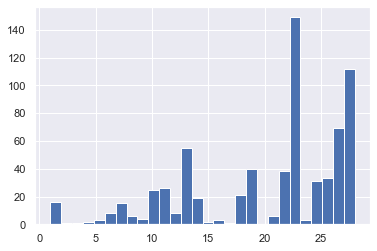

In [209]:
# Frequency of reason for absence
df1['reason_for_absence'].hist(bins=df['reason_for_absence'].nunique());

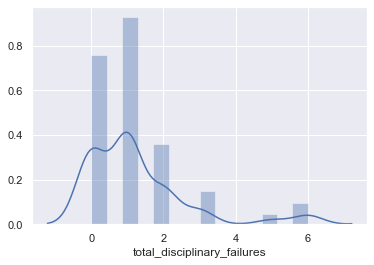

In [217]:
sns.distplot(df1.total_disciplinary_failures);

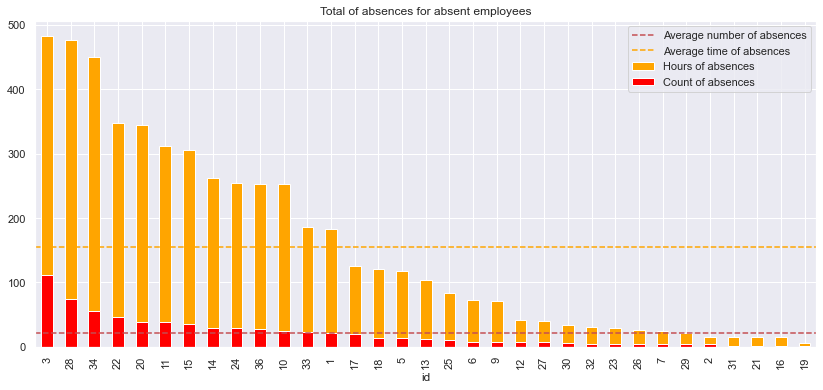

In [251]:
# total time of absenteeism and count of absence per people

count_absence = df1.groupby('id').reason_for_absence.count().sort_values(ascending=False)
avg_count_absence = count_absence.mean()

count_absence_time = df1.groupby('id').absenteeism_time_in_hours.sum().sort_values(ascending=False)
avg_time_absence = count_absence_time.mean()

fig, ax1=plt.subplots(figsize=(14,6))

count_absence_time.plot(kind='bar', color='orange', label='Hours of absences')
count_absence.plot(kind='bar', color='red', label='Count of absences')

xmin, xmax = ax.get_xlim()
plt.hlines(y=avg_count_absence, xmin=xmin, xmax=xmax, colors='r', linestyles='dashed',\
           label='Average number of absences')

plt.hlines(y=avg_time_absence, xmin=xmin, xmax=xmax, colors='orange', linestyles='dashed',\
           label='Average time of absences')

plt.legend()
plt.title('Total of absences for absent employees')
plt.show()

Text(0.5, 0, 'Total count of absence per employee')

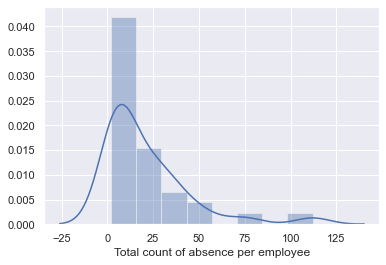

In [221]:
sns.distplot(count_absence)
plt.xlabel('Total count of absence per employee')

In [222]:
# Total Absenteeism by people
df1.groupby('id').absenteeism_time_in_hours.agg('sum').describe()

count     33.000000
mean     155.272727
std      148.538983
min        6.000000
25%       30.000000
50%      104.000000
75%      254.000000
max      482.000000
Name: absenteeism_time_in_hours, dtype: float64

In [ ]:
# trend of absenteeism for month and weekday

In [ ]:
# trend of absence regarding seasons and distance 
# (Are people living far away from the work lazy to come at work because of the weather?)

In [ ]:
# average time and count of absences per reason 

In [ ]:
# average time and count of absences per disciplinary (are bad people more often absent)

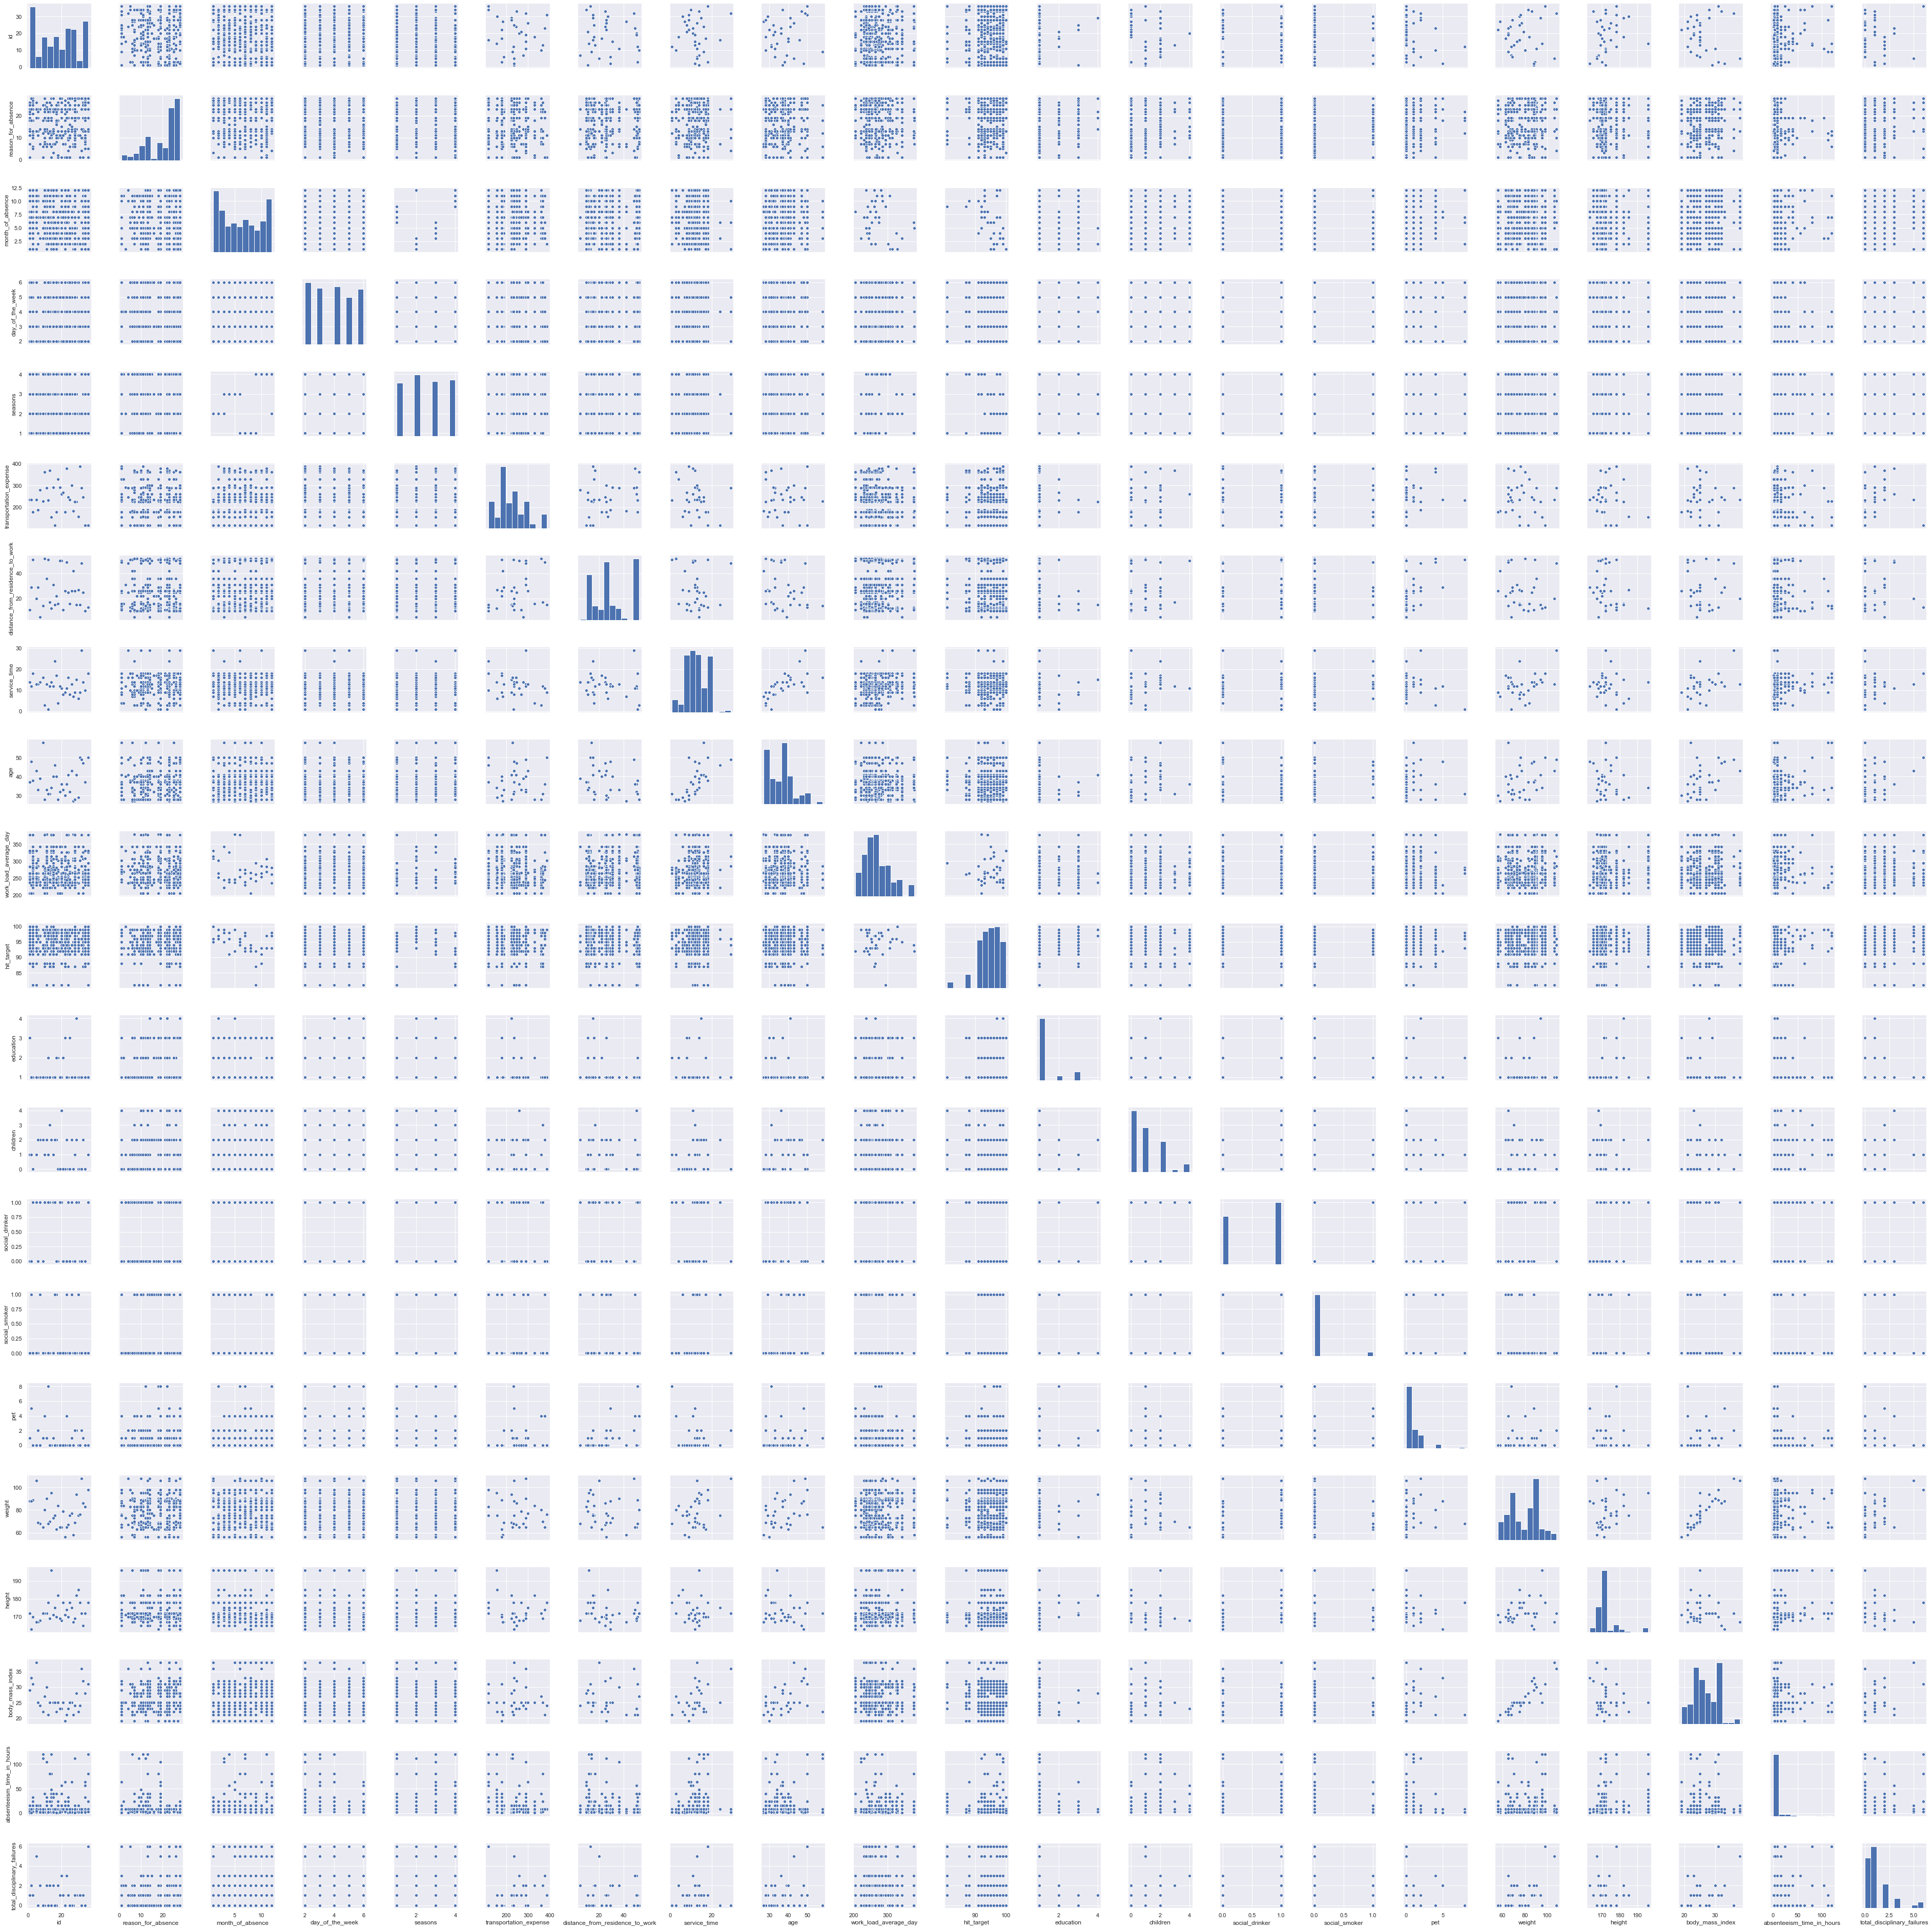

In [252]:
# pairplot to detect any linearity between variables 
sns.pairplot(df1);